In [1]:
print('hello')

hello


In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# --- CẤU HÌNH ĐƯỜNG DẪN ---
# Hãy sửa lại đường dẫn này trỏ đúng vào thư mục train của bạn
TRAIN_PATH = '../data/train'

### Đọc ảnh gốc, gộp các mask con

In [9]:
def visualize_samples(path, num_samples=3):
    # Lấy danh sách ID các ảnh
    if not os.path.exists(path):
        print(f"❌ Đường dẫn không tồn tại: {path}")
        return
    all_ids = next(os.walk(path))[1] # Lấy danh sách folder con
    print(f"Tổng số ảnh trong tập train: {len(all_ids)}")
    
    # Chọn ngẫu nhiên n ảnh để xem
    sample_ids = random.sample(all_ids, num_samples)
    
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, 5 * num_samples))
    
    for i, id_ in enumerate(sample_ids):
        img_path = os.path.join(path, id_, 'images', id_ + '.png')
        mask_dir = os.path.join(path, id_, 'masks')
        
        # 1. Đọc ảnh gốc
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Chuyển BGR sang RGB để hiển thị đúng màu
        h, w, _ = image.shape
        
        # 2. Đọc và gộp Mask
        # Tạo mask nền đen
        mask = np.zeros((h, w), dtype=np.uint8)
        
        # Duyệt qua từng file mask con và cộng gộp vào mask tổng
        if os.path.exists(mask_dir):
            for mask_file in next(os.walk(mask_dir))[2]:
                mask_path = os.path.join(mask_dir, mask_file)
                m = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
                # Dùng np.maximum để đè các mask lên nhau, tránh cộng dồn giá trị vượt quá 255
                mask = np.maximum(mask, m)
        
        # 3. Tạo ảnh Overlay (Chồng mask lên ảnh gốc để kiểm tra độ khớp)
        # Tạo một layer màu vàng cho mask
        overlay = image.copy()
        overlay[mask > 0] = (255, 255, 0) # Màu vàng
        
        # Pha trộn ảnh gốc và overlay (alpha blending)
        combined = cv2.addWeighted(image, 0.6, overlay, 0.4, 0)
        
        # Vẽ viền cho đẹp
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(combined, contours, -1, (0, 255, 0), 1) # Viền xanh lá

        # --- HIỂN THỊ ---
        # Cột 1: Ảnh gốc
        axes[i, 0].imshow(image)
        axes[i, 0].set_title(f"Original Image\nID: {id_}", fontsize=10)
        axes[i, 0].axis('off')
        
        # Cột 2: Mask (Ground Truth)
        axes[i, 1].imshow(mask, cmap='gray')
        axes[i, 1].set_title(f"Combined Mask\n(Nuclei count: {len(contours)})", fontsize=10)
        axes[i, 1].axis('off')
        
        # Cột 3: Overlay (Kiểm tra khớp)
        axes[i, 2].imshow(combined)
        axes[i, 2].set_title("Overlay Check", fontsize=10)
        axes[i, 2].axis('off')

    plt.tight_layout()
    plt.show()

### Hien thi hinh anh

Tổng số ảnh trong tập train: 670


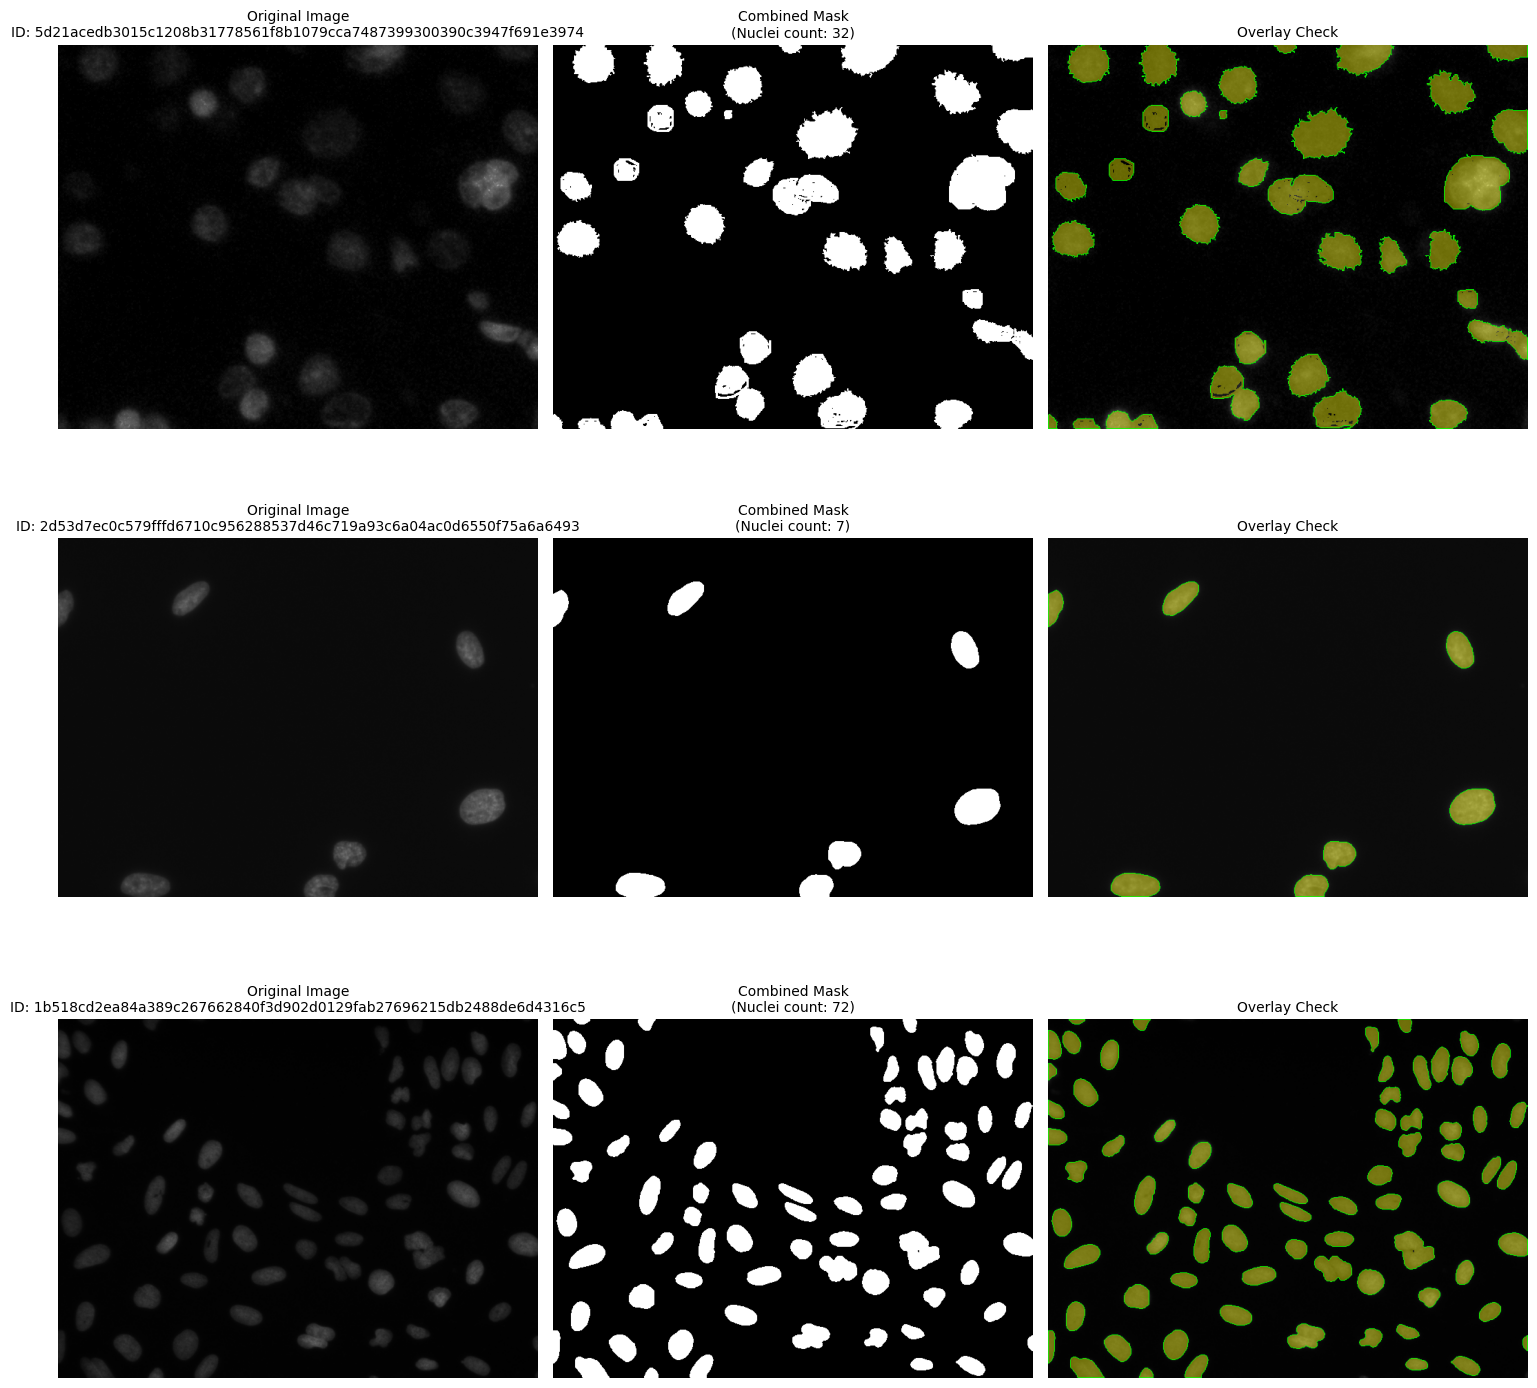

In [10]:
visualize_samples(TRAIN_PATH, num_samples=3)